In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score   
import math

%matplotlib inline

In [3]:
sales_train_raw = pd.read_csv('../resources/sales_train_v2.csv')

In [4]:
sales_train = sales_train_raw.copy()
sales_train_full = sales_train_raw.copy()

In [5]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
item_cnt_by_shop = sales_train.groupby(['shop_id'])['item_cnt_day'].agg(sum)

<Container object of 60 artists>

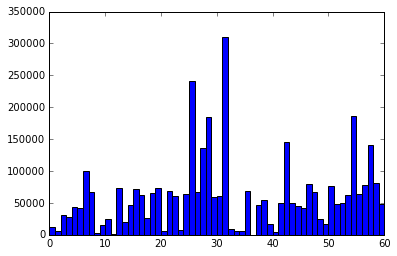

In [7]:
plt.bar(item_cnt_by_shop.index,item_cnt_by_shop,1, color = 'blue')

In [8]:
recent_shops = sales_train_full[sales_train_full['date_block_num'] >= 30]['shop_id'].unique()
closed_shops = sales_train_full[~sales_train_full['shop_id'].isin(recent_shops)]['shop_id'].unique()

In [9]:
closed_shops

array([23, 29,  0,  1,  8, 13, 30, 32, 54, 43, 17, 40, 33, 11], dtype=int64)

In [10]:
sales_train.loc[sales_train['shop_id'].isin(closed_shops), 'item_cnt_day'] = 0

In [11]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


<Container object of 60 artists>

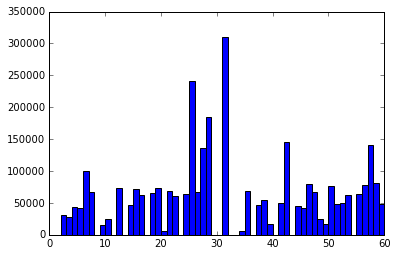

In [12]:
item_cnt_by_shop = sales_train.groupby(['shop_id'])['item_cnt_day'].agg(sum)
plt.bar(item_cnt_by_shop.index,item_cnt_by_shop,1, color = 'blue')

In [13]:
sales_train.drop(['item_price','date'], axis = 1, inplace = True)

In [14]:
sales_train.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
2,0,25,2552,-1.0
3,0,25,2554,1.0
4,0,25,2555,1.0


In [15]:
item_cnt_by_shop = sales_train.groupby(['date_block_num','shop_id','item_id']).sum()

In [16]:
item_cnt_by_shop.reset_index(['date_block_num','shop_id','item_id'],inplace = True)

In [17]:
item_cnt_by_shop.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,0.0
1,0,0,33,0.0
2,0,0,35,0.0
3,0,0,43,0.0
4,0,0,51,0.0


In [18]:
item_cnt_by_shop.rename(columns={'item_cnt_day':'item_cnt_month'}, inplace = True)

In [19]:
X = item_cnt_by_shop.loc[:,item_cnt_by_shop.columns != 'item_cnt_month']
y = item_cnt_by_shop['item_cnt_month']

In [20]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: item_cnt_month, dtype: float64

In [21]:
linReg = LinearRegression()

In [22]:
scores = cross_val_score(linReg,X,y,cv=10,scoring="neg_mean_squared_error")

In [23]:
math.sqrt(abs(scores.mean()))

8.223575211755994

In [24]:
test_raw = pd.read_csv('../resources/test.csv')

In [25]:
test = test_raw.copy()
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [26]:
sample = pd.read_csv('../resources/sample_submission.csv')
sample.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
